# World Happiness Report


The UN releases a yearly World Happiness Report - a ranking of which countries in the world could be considered as "happy". This report contains about 155 countries around the world. This ranking could be an indication of a country's progress, the operative word is 'could'.

The UN looked at seven different variables and took a survey of the population in order to construct an overall "happiness score". The Happiness Score is derived simply by interviewing a random population sample from each country in a poll that “asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.”


Using these seven variables, we can construct a linear regression model which may help us predict the happiness score in these countries. We can then compare the predicted score to the actual score to observe how accurate our model is.


In this notebook, I will carry out an exploratory data analysis of the World Happiness Reports for years 2015-2019. I will also use the linear regression model to predict the happiness score for a selected set of data.

I will attempt to answer this question; What factors influence the happiness of citizens the most?

The steps include:

1.Data Understanding and Cleaning

2.Data Visualization and Analysis

3.Modeling and Prediction

4.Model Evaluation

In [1]:
# importing python libraries      

import pandas as pd                  # for data manipulation

import numpy as np                   # for mathematical calculations

import seaborn as sns                # for data visualization

import matplotlib.pyplot as plt      # for plotting graphs
plt.style.use('seaborn')             # the seaborn stylesheet will make our plots look neat and pretty.

%matplotlib inline                   
# "%matplotlib inline" ensures commands in cells below the cell that outputs a plot does not affect the plot
    
import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

## Data Understanding and Cleaning

In [2]:
# Loading the data

whr_2015 = pd.read_csv('2015.csv')
whr_2016 = pd.read_csv('2016.csv')
whr_2017 = pd.read_csv('2017.csv')
whr_2018 = pd.read_csv('2018.csv')
whr_2019 = pd.read_csv('2019.csv')

In [3]:
#previewing 2015 report
# .head() returns the first 5 rows in the dataframe

whr_2015.head()

# Alternatively, you can use 'train.sample(5)'' to get the same output

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#previewing 2016 report

whr_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
#previewing 2017 report

whr_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
#previewing 2018 report

whr_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
#previewing 2019 report

whr_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
years = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]

for year in years:
    print(year.shape)                                             # returns the no. of rows and columns
    print(year.columns)                                           # returns the no. names of columns

(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
(155, 12)
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
(156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support',

In [9]:
# dropping irrelevant columns
# (inplace=True) argument means that changes made to the dataframe remains permanent.

whr_2015.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)

whr_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Region', 'Dystopia Residual'], inplace=True)

whr_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)

#nothing to drop for 2018 and 2019 dataframe

In [10]:
# Adding a new column 'Year' to indicate the year of report collation

whr_2015['Year'] = 2015
whr_2016['Year'] = 2016
whr_2017['Year'] = 2017
whr_2018['Year'] = 2018
whr_2019['Year'] = 2019

In [11]:
# Reordering the columns to acheive uniformity

whr_2015 = whr_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
whr_2016 = whr_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
whr_2017 = whr_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.', 'Year']]

# whr_2018 and whr_2019 already have the correct order so no need to reorder

In [12]:
#renaming the columns to ensure all columns have same name across the years

# New column names = new_cols
new_cols = ['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption', 'Year']

years = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]
for year in years:
    year.columns = new_cols
    #print(year.columns)

### Features Description

Happiness Rank: A country's rank on a world scale - determined by how high their happiness score is.
    
Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category (normalized)
    
Country: The country in question
        
GDP per capita: individuals rank they quality of life based on the amount they earn
    
Social Support: quality of family life, nuclear and joint family
    
Healthy Life Expectancy: ranking healthcare availability and average life expectancy in the country
    
Freedom to make life choices: how much an individual is able to conduct them self based on their free will
    
Perceptions of Corruption: Trust in the government to not be corrupt
    
Generosity: how much their country is involved in peacekeeping and global aid

In [13]:
#merging all 5 dataframes into one

whr_all = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]

happiness = pd.concat(whr_all)

happiness.head()

,Happiness Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [14]:
# This is used to view basic statistical details like percentile, mean, std etc.

happiness.describe(include='all')        

,Happiness Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Year
count,782.000000,782,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
unique,NaN,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Turkmenistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.698210,NaN,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,45.182384,NaN,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816,1.417364
min,1.000000,NaN,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,NaN,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,79.000000,NaN,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000,2017.000000
75%,118.000000,NaN,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030,2018.000000


In [15]:
# Checking to see if any feature has empty/missing values

happiness.isnull().sum()

Happiness Rank                  0
Country                         0
Happiness Score                 0
GDP per capita                  0
Social Support                  0
Healthy Life Expectancy         0
Freedom to Make Life Choices    0
Generosity                      0
Perceptions of Corruption       1
Year                            0
dtype: int64

The 'Perceptions of Corruption' column has one empty row, this will be replaced by median imputation

In [16]:
# filling the empty row with the median of the colunm

median = happiness['Perceptions of Corruption'].median()
#print(median)

happiness['Perceptions of Corruption'].fillna(median, inplace = True)

In [17]:
# checking for duplicate values

happiness.duplicated().sum()

0

In [18]:
# The info() function is used to print a concise summary of a DataFrame

happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Happiness Rank                782 non-null    int64  
 1   Country                       782 non-null    object 
 2   Happiness Score               782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social Support                782 non-null    float64
 5   Healthy Life Expectancy       782 non-null    float64
 6   Freedom to Make Life Choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of Corruption     782 non-null    float64
 9   Year                          782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


We see that after cleaning we have 782 rows of clean data with no null values. There are 10 columns and three dtypes(int, float and object)

The data is now clean and void of unnecessary features, we can now proceed to visualizing the data to see the relationship between features

In [19]:
#happiness.to_csv('cleaned_happiness.csv', index =False)

## Data Visualization and Analysis

### Univariate Plots
This is the plots of each individual variable. They help us understand each attribute better.

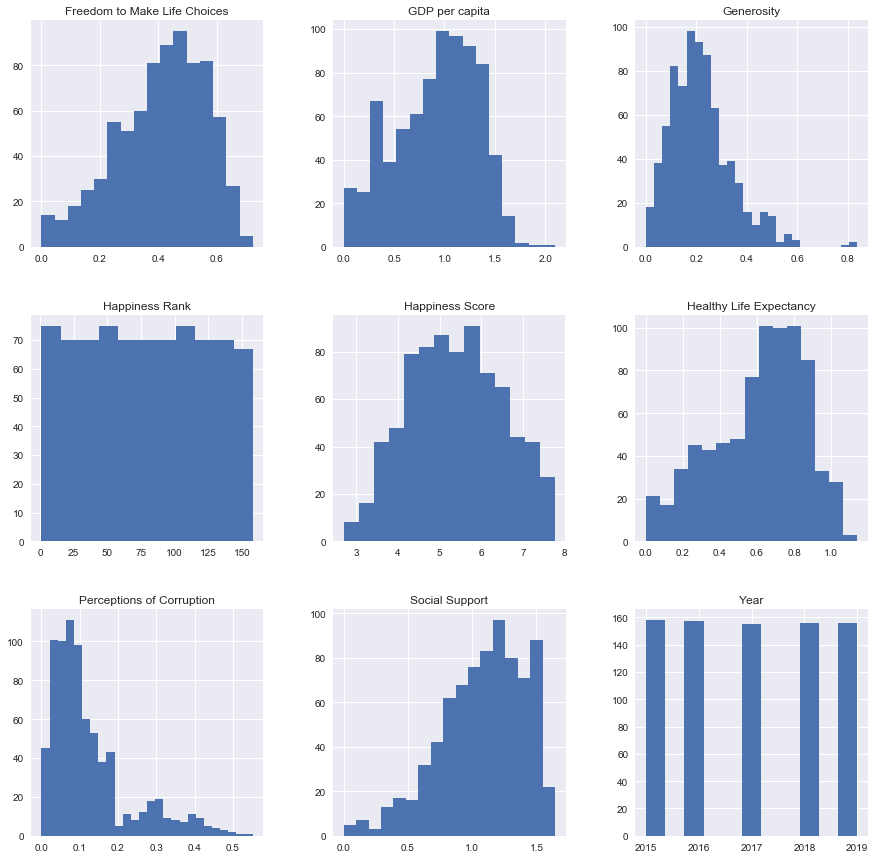

In [20]:
# checking the frequency distribution of the variables

happiness.hist(bins='auto', figsize=(15,15));

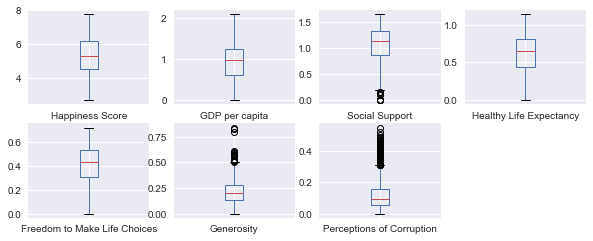

In [21]:
# We can check for outliers using boxplots

happiness[['Happiness Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

### Bivariate Plots

This is used to understand the relationship between variables

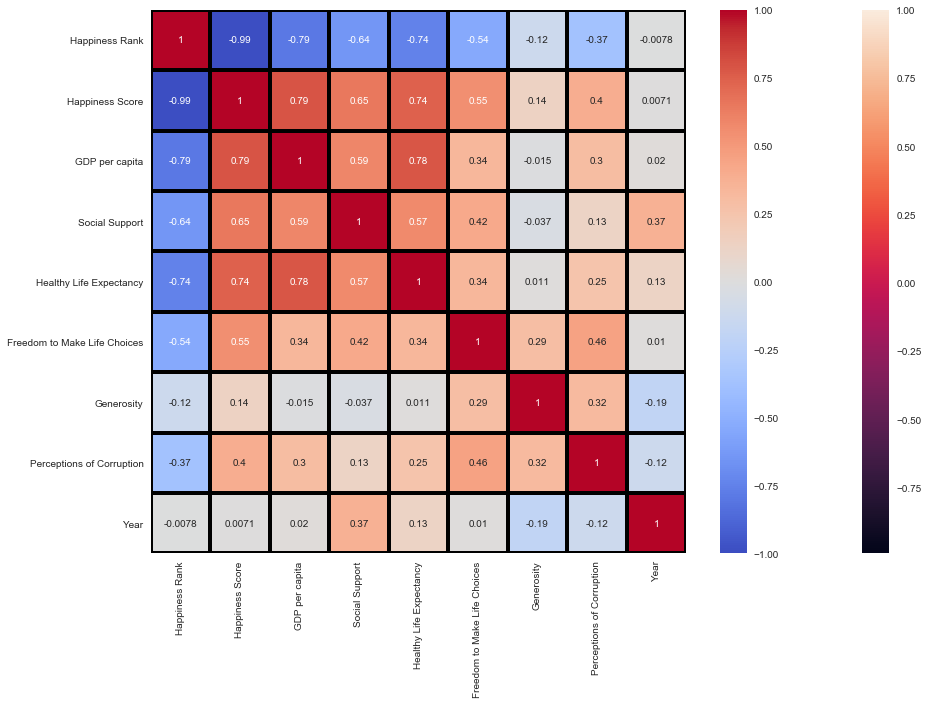

In [22]:
# let's see the correlation between the features
# Checking the correlation of features helps us decide which features affect the target variable the most, and in turn, get used in predicting the target variable.




plt.figure(figsize=(15, 10))                 # This specifies the size, the bigger the map, the easier we can understand the map

sns.heatmap(happiness.corr())                # This is sufficient but adding the 'annot' argument makes interpretaton easier

sns.heatmap(happiness.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')  # 'annot' helps display the correlation coefficient


plt.show()

The darker the box, the stronger/higher the correlation.

Happiness Score correlates strongly with GDP per capita and Healthy Life Expectancy. It has low correlates with Generosity and Perceptions of Corruption.

Also, there is an inverse relationship between Happiness rank and Happiness score; the higher the score, the lower the rank.

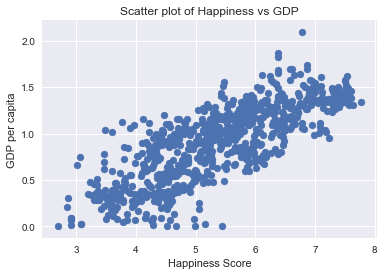

In [23]:
# lets's further investigate the relationship between happiness score and GDP

happiness_score = happiness['Happiness Score']
gdp= happiness['GDP per capita']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()

The diagram above shows that, the higher the gdp, the higher the happiness score

In [24]:
# happiest countries

happy_countries = happiness[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
happy_countries.head()


,Happiness Rank
Country,
Denmark,2.2
Norway,2.8
Iceland,3.2
Switzerland,3.6
Finland,3.6


In [25]:
# saddest countries 

sad_countries = happiness[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
sad_countries.tail()


,Happiness Rank
Country,
Tanzania,150.80
Rwanda,152.00
Syria,152.60
Central African Republic,153.25
Burundi,153.80


In [26]:
# What countries have the highest GDP per capita over the years?

rich_countries = happiness[['Country', 'GDP per capita']].groupby('Country').mean().sort_values(by='GDP per capita', ascending=False)
rich_countries.head()


,GDP per capita
Country,
Qatar,1.743691
United Arab Emirates,1.645227
Luxembourg,1.637675
Singapore,1.592138
Kuwait,1.555662


In [27]:
# What countries have the highest life expectancy over the years?

healthy_countries = happiness[['Country', 'Healthy Life Expectancy']].sort_values(by='Healthy Life Expectancy', ascending=False)
healthy_countries.head()



,Country,Healthy Life Expectancy
33,Singapore,1.141
75,Hong Kong,1.122
57,Japan,1.088
29,Spain,1.062
5,Switzerland,1.052


In [28]:
# lowest life expectancy

low_life_expectancy = happiness[['Country', 'Healthy Life Expectancy']].sort_values(by='Healthy Life Expectancy', ascending=False)
low_life_expectancy.tail()


,Country,Healthy Life Expectancy
112,Sierra Leone,0.0
134,Swaziland,0.0
110,Sierra Leone,0.0
138,Lesotho,0.0
122,Sierra Leone,0.0


In [29]:
# How does my country rank?

nigeria = happiness[happiness.Country == 'Nigeria']
nigeria

,Happiness Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Year
77,78,Nigeria,5.268,0.654350,0.90432,0.160070,0.343340,0.272330,0.040300,2015
102,103,Nigeria,4.875,0.752160,0.64498,0.051080,0.278540,0.232190,0.030500,2016
94,95,Nigeria,5.074,0.783756,1.21577,0.056916,0.394953,0.230947,0.026122,2017
90,91,Nigeria,5.155,0.689000,1.17200,0.048000,0.462000,0.201000,0.032000,2018
84,85,Nigeria,5.265,0.696000,1.11100,0.245000,0.426000,0.215000,0.041000,2019


I agree with this ranking, Nigeria is a difficult country to live in.

## Modeling and Prediction

Now that the data is clean and we have an understandng of the variables, we can now construct a model. 

First, we drop any categorical variables, and the happiness rank as that is not something we are exploring in this report.

In [30]:
# We'll drop the Country variable because it's categorical, we'll also drop the happiness rank and year variable beacuse it's irrelevant to this model
# this leaves only numerical features in the data frame


new_happiness = happiness.drop(['Country', 'Happiness Rank', 'Year'], axis=1)
new_happiness.head()
#new_happiness.info()

,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [31]:
# let's split our data into training(80%) and testing(20%) sets

from sklearn.model_selection import train_test_split

# features with low corelation has been removed

X = new_happiness[['GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices']]
y = new_happiness['Happiness Score']

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Next we need to scale the data before feeding it to the model
# To standardize our data, we need to import the StandardScaler from the sklearn library 

from sklearn.preprocessing import StandardScaler 


scale = StandardScaler()

new_happiness = scale.fit_transform(new_happiness)

In [33]:
# Training the algorithm

from sklearn.linear_model import LinearRegression

lm = LinearRegression()                         # instantiating the model

lm.fit(X_train, y_train)                        # fitting the model with the training dataset


#print(lm.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# making predictions on the test data

y_pred = lm.predict(X_test)

# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred 

,Actual,Predicted
67,5.525,5.750436
17,6.886,6.626951
36,6.344,6.278800
14,7.119,6.560101
145,3.781,4.192592
...,...,...
64,5.709,5.547671
152,3.303,4.678981
52,5.878,5.596648
21,6.627,6.750217


In [35]:
coefficient = lm.coef_

#making a dataframe of the coeffiecients to help us easily determine which variable carries more weight


coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,GDP per capita,1.210445
1,Social Support,0.470579
2,Healthy Life Expectancy,1.041019
3,Freedom to Make Life Choices,1.889035


From the output above, we see that, Freedom to make life choices not GDP per capita is the most important factor contributing to happiness of citizens, as opposed to the result we got from the heatmap. 

This shows that correlation doesn't necessarily mean causation. Health and social support are also important but carry less weight in this model.

## Model Evaluation

For this model, I will use the most common evaluation metric for regressions: Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [36]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.5601640575464226


The lower the RMSE, the better the model is at making predictions.

The RMSE is low, further feature engineering can lead to a lower RMSE score.

### Conclusion

Answer to the question posed at the beginning; What factors influence the happiness of citizens the most?

GDP per capita, Freedom to make life choices and Life expectancy are great determinants of Happiness score and can be used to predict the future scores. However, this is not conclusive because unforeseen occurences like pandemic, natural disasters and economic meltdown happen, even to the most stable countries so these scores can actually change.